In [2]:
import h5py
file = h5py.File('outputs/f115w/f115w_A1.h5')
file.keys()

<KeysViewHDF5 ['a_image', 'b_image', 'dec', 'flux_aper_f115w', 'flux_auto_f115w', 'flux_err_aper_f115w', 'flux_err_auto_f115w', 'id', 'image', 'ra', 'seg', 'sersic', 'sersic_err', 'snr_f115w', 'theta_image', 'tile']>

In [3]:
file['id'],file['image']

(<HDF5 dataset "id": shape (31359,), type "<i8">,
 <HDF5 dataset "image": shape (31359, 128, 128), type "<f4">)

In [1]:
from torchvision import transforms
from astroclip.astrodino.data.augmentations import ToRGB
from astroclip.astrodino.data.loaders import make_data_loader, make_dataset
import numpy as np

/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/lightning/fabric/__init__.py:41: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/u/yacheng/conda-envs/astrodino/lib/python3.10/site-packages/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  

{'split': 'train', 'root': '/ptmp/yacheng/outthere_ssl/images/cosmos_2025/outputs/', 'filter': 'f115w'}


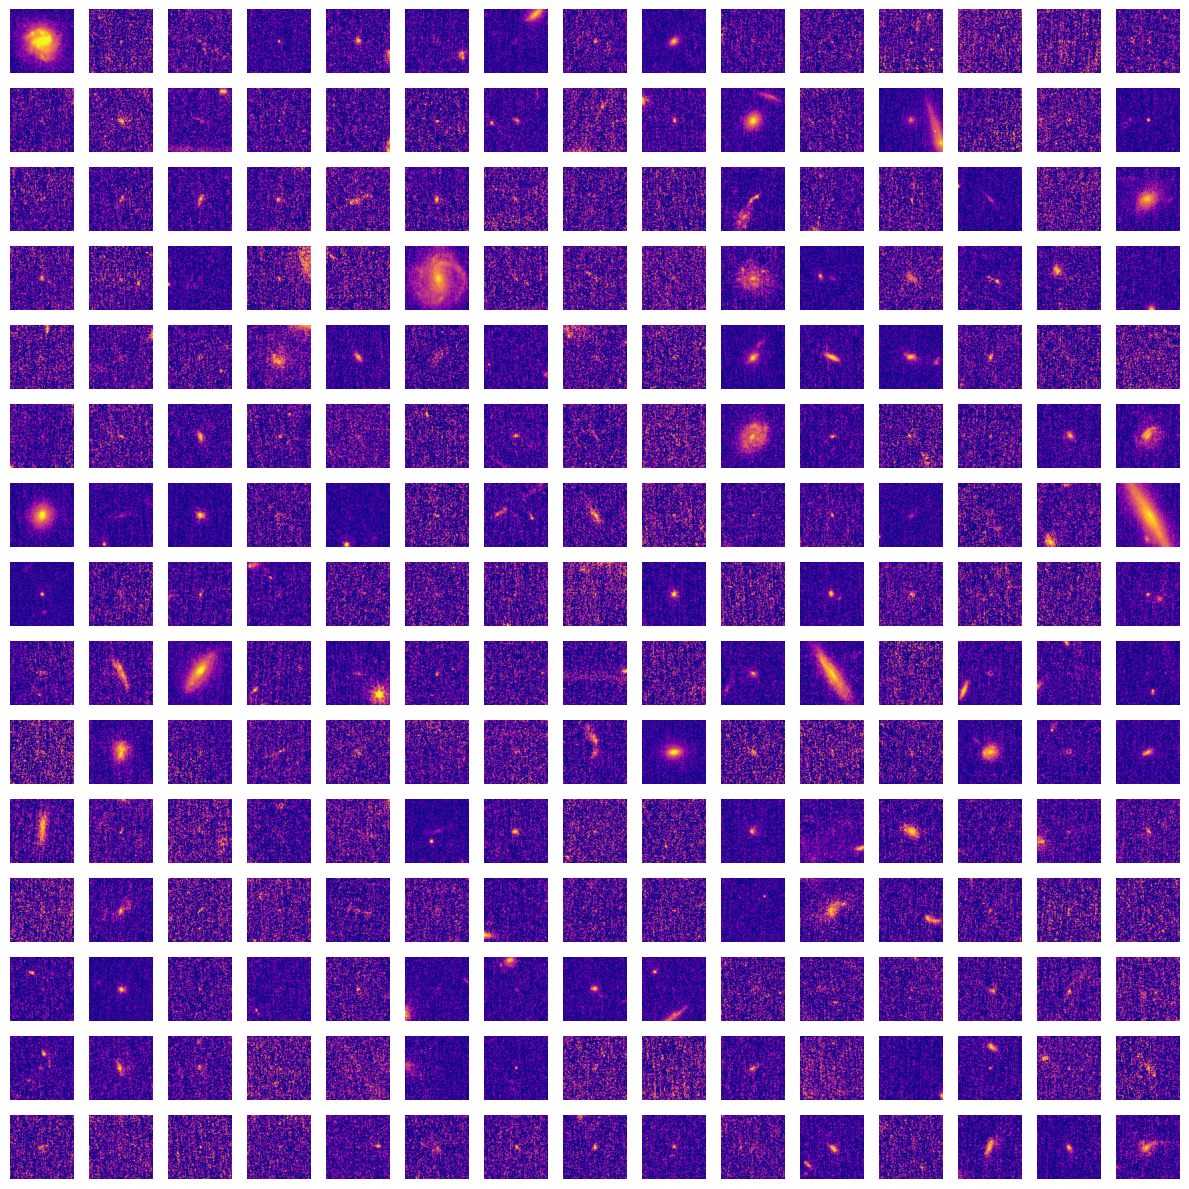

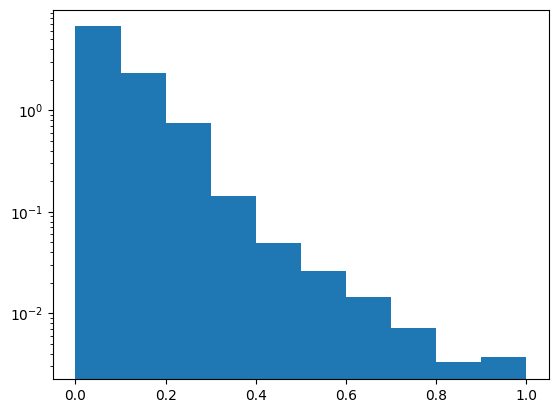

In [8]:
crop_size = 72

transform = transforms.Compose(
    [
        transforms.CenterCrop(crop_size),
        ToRGB(Q=20,m=0.01),
    ]
)

dataset = make_dataset(
    dataset_str="jwst:split=train:root=/ptmp/yacheng/outthere_ssl/images/cosmos_2025/outputs/:filter=f115w",
    transform=transform,
    channel=0,
)

#make a 8x8 subplot to check the images
start_index=35307
grid_size = 15
import matplotlib.pyplot as plt
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))
hist_data = []
for i in range(grid_size):
    for j in range(grid_size):
        img, _ = dataset[i * grid_size + j+start_index]
        hist_data.append(img[0])
        axs[i, j].imshow(img[0],cmap='plasma')
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()
    
plt.hist(np.array(hist_data).flatten(),density=True)
plt.yscale('log')
    

{'split': 'train', 'root': '/ptmp/yacheng/outthere_ssl/', 'extra': '""'}


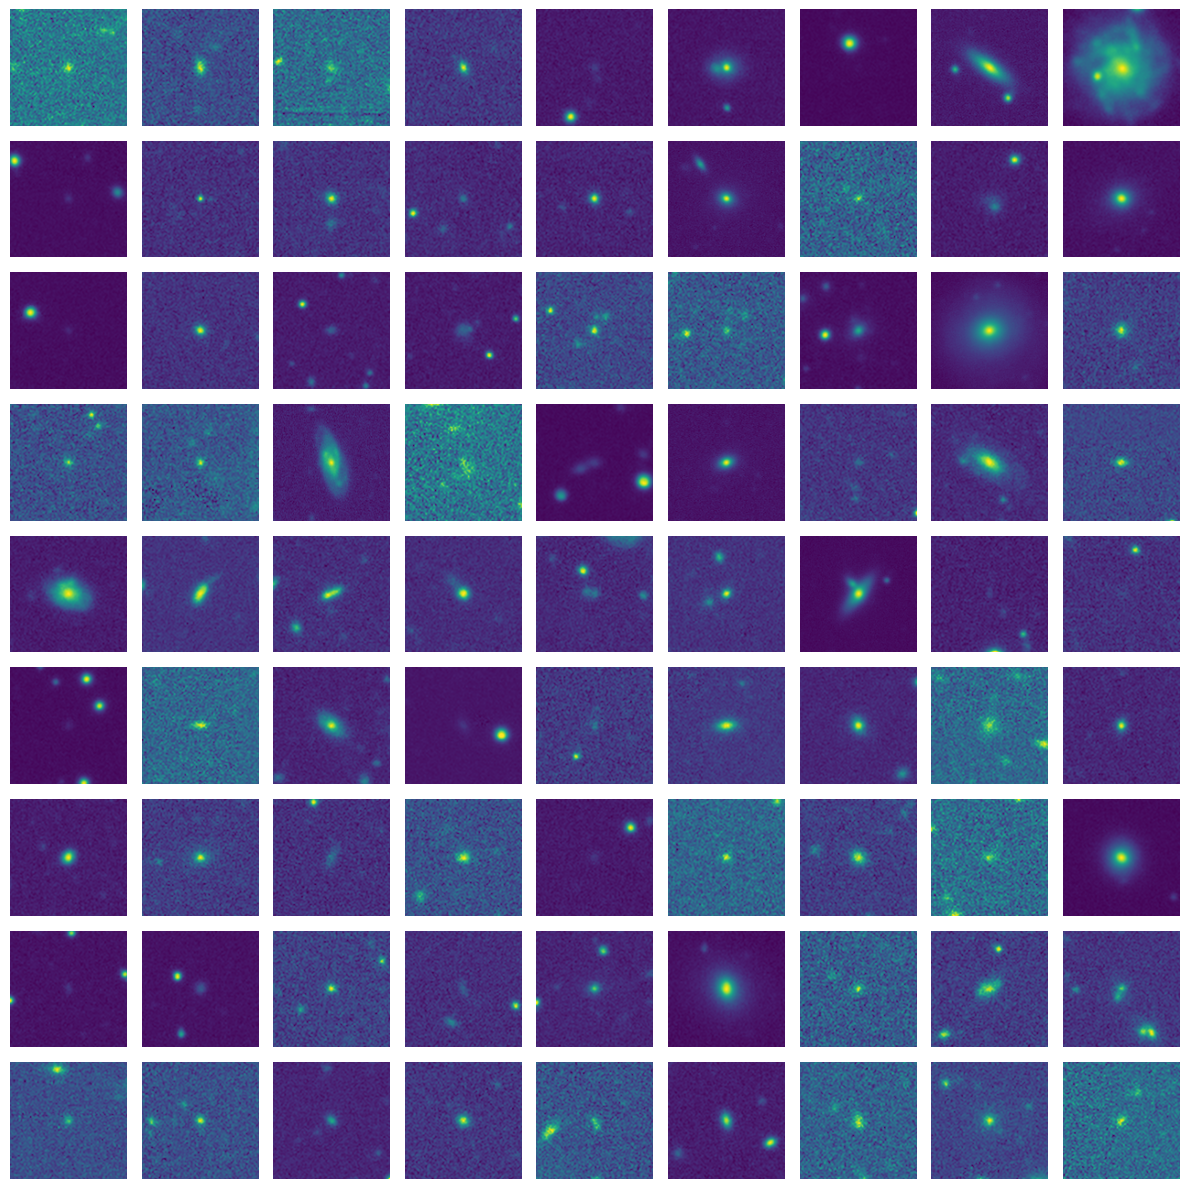

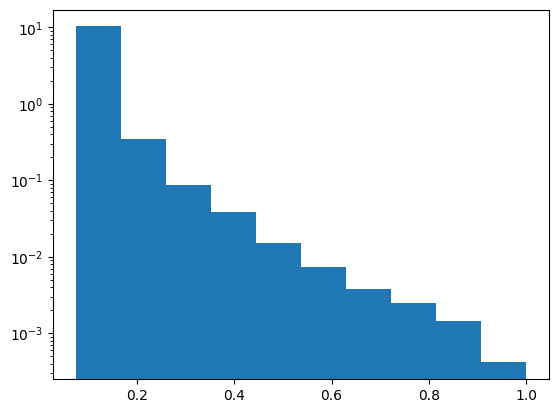

In [93]:
crop_size = 128

transform = transforms.Compose(
    [
        transforms.CenterCrop(crop_size),
        ToRGB(),
    ]
)

dataset = make_dataset(
    dataset_str="LegacySurvey:split=train:root=/ptmp/yacheng/outthere_ssl/:extra=\"\"",
    transform=transform,
    channel=0,
)

#make a 8x8 subplot to check the images
start_index=9060
grid_size = 9
import matplotlib.pyplot as plt
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))
hist_data = []
for i in range(grid_size):
    for j in range(grid_size):
        img, _ = dataset[i * grid_size + j+start_index]
        hist_data.append(img[0])
        axs[i, j].imshow(img[0])
        axs[i, j].axis('off')
plt.tight_layout()
plt.show()
    
plt.hist(np.array(hist_data).flatten(),density=True)
plt.yscale('log')
    